In [1]:
# specify your studentb  id and your name
id = 'W20072488'
name = 'Ciara Power'

In [2]:
# setup magic - see kmurphy.bitbucket.org/modules/Advanced_Calculus for setup instructions.
%matplotlib inline
from calculus import *
setup_practical(id, name)

Ver 0.3


# Practical 09 - Applications of Differentiation

## Introduction

### Aim

In this practical we will use python to study various problems based on applications of differentiation (optimisation, etc.)
 
### Mathematics Concepts

 * A __smooth__ function $f(t)$, has a __stationary point__ (local max, local min, points of inflection) at all value of $t=t^*$ if   

\\[
    f'(t^*) = 0
\\]

 * A stationary point is (second derivative test)
     * a local maximum if $f''(t^*) <0$
     * a local minimum if $f''(t^*) >0$
     * a local maximum, local minimum or a point of inflection if $f''(t^*) =0$
 
### Python Concepts

 * The Python symbolic module, __sympy__, has functions 
    * __symbols__ or (better) __Symbol__ define a symbol 
    * __Funciton__ to define a symbolic funciton
    * __limit(f, t, t0)__ - compute the limit of the experssion, __f__, as the variable __t__ tends towards __t0__.
    * __diff(f, t)__ - differentiation the function, __f__, with respect to variable __t__.
    * __display__ to dispaly an experssion using mathematics notation.
    * __log(v,b)__ to calculate the log of __v__ to base __b__.
   and from __sympy.solvers__
    * __solve__ to solve an algebraic equation.
    
   and methods 
    * __subs(exp_old,exp_new)__ to substitute sub-expresion __exp_old__ with __exp_new__.  
    * __diff(var)__ to differentiate an expression with respect to variable __var__.

## Standard Importing of  Libraries


In [3]:
# for numeric work
import numpy as np
import matplotlib.pyplot as plt

# for symbolic work
import sympy as sym
from sympy.plotting import plot

# mathematical output 
from sympy import *
from IPython.display import display
sym.init_printing(pretty_print=True)

## Helper functions

In [4]:
def secondDerivativeTest(f,x,xStar):
    
    df = f.diff(x)   # get first derivative
    if df.subs(x, xStar)!=0:
        return "The value %s does not appear to be a stationary point"%xStar
    
    ddf = df.diff(x)  # get second derivative
    result = ddf.subs(x,xStar)
    if result<0:
        return "The value %s is a local maximum."%xStar
    elif result>0:
        return "The value %s is a local minimum."%xStar
    else:
        return "The value %s is a local maximum, local minimum, or a point of inflection."%xStar

## Examples

####Example 1 - Oil Refinery

The daily profit, $p$, of an oil refinery is given by
\\[
    p = 8x − 0.02x^2,
\\]

where $x$ is the number of barrels of oil refined. 

**(a)** Plot the profit.

**(b)** How many barrels will give maximum profit?

**(c)** What is the maximum profit?

In [5]:
# define symbols
x = Symbol('x')
p = 8*x - 0.02*x*x
display("Function p(x)",p)

'Function p(x)'

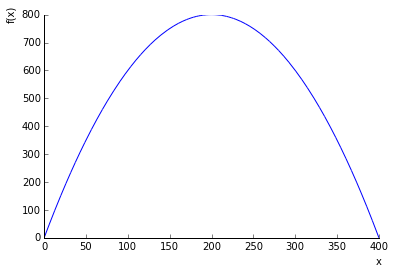

In [6]:
# (a) Plot the profit

# With a bit of trial and error a reasonable plot range is 0..400
plot(p,(x,0,400));

In [7]:
# (b) How many barrels will give maximum profit?
dp = p.diff(x)          # get the derivative of p with respect to x
display("Derivative of p(x)",dp)
xStar = solve(dp)       # solve (derivative=0) to get stationary points
display("Stationary points",xStar)
ddp = p.diff(x,2)       # get second derivative
display("Second derivative of p(x)",ddp)
ddp.subs(x,xStar[0])

'Derivative of p(x)'

'Stationary points'

'Second derivative of p(x)'

The second derivative is negative so this is a local maximum. Using our helper function we can do the following

In [8]:
secondDerivativeTest(p,x,xStar[0])

'The value 200.000000000000 is a local maximum.'

In [9]:
# (c) What is the maximum profit?
display('The maximum profit is ', p.subs(x,xStar[0]))

'The maximum profit is '

#### Example 2 - Removing extra variables using a constraint

![](http://intmstat.com/applications-differentiation/Image761.gif)

A rectangular storage area is to be constructed along the side of a tall building. A security fence is required along the remaining 3 sides of the area. 

**(a)** What is the maximum area that can be enclosed with 800 m of fencing?

In [10]:
# define symbols
x = Symbol('x')
y = Symbol('y')
p = 2*x+y           # constraint (must be =800)
display(p)
a = x*y             # objective function 
display(a)

In [11]:
# elimate variable y using the constraint p=800
yConstraint = solve(p-800,y)[0]
a = a.subs(y,yConstraint)
display(a)

In [12]:
# happy days, objective function depends on a single vairable, differentiate away
da = a.diff(x)
display("Derivative of a(x)",da)
xStar = solve(da)       # solve (derivative=0) to get stationary points
display("Stationary points",xStar)
secondDerivativeTest(a,x,xStar[0])

display("The maximum area is", a.subs(x,xStar[0]))
display("At maximum area x is", xStar[0])
display("At maximum area y is", yConstraint.subs(x,xStar[0]))

'Derivative of a(x)'

'Stationary points'

'The maximum area is'

'At maximum area x is'

'At maximum area y is'

## Questions

### Question 1

Consider the function 
\\[
    f(x) = x(4-x)
\\]

**(a)** Generate a plot of $f$ showing all of the stationary points (only one).

**(b)** Determine each of the stationary points of $f$ and classify them using the second derivative test.

In [13]:
# define symbols
# define symbols
x = Symbol('x')
f = x*(4-x)
display("Function f(x)",f)

'Function f(x)'

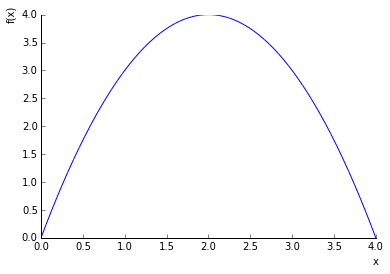

In [14]:
# (a) Generate a plot of $f$ showing all of the stationary points.
plot(f,(x,0,4));

In [15]:
# (b) Determine each of the stationary points of $f$ and classify them using the second derivative test.
df = f.diff(x)          
display("Derivative of f(x)",df)
xStar = solve(df)       # solve (derivative=0) to get stationary points
display("Stationary points",xStar)
ddf = f.diff(x,2)       # get second derivative
display("Second derivative of f(x)",ddf)
ddf.subs(x,xStar[0])

'Derivative of f(x)'

'Stationary points'

'Second derivative of f(x)'

#### Question 2

Consider the function 
\\[
    f(x) = x^2(8-x^2)
\\]

**(a)** Generate a plot of $f$ showing all of the stationary points.

**(b)** Determine each of the stationary points of $f$ and classify them using the second derivative test.

In [16]:
# define symbols
x = Symbol('x')
f = x**2*(8-x**2)
display("Function f(x)",f)

'Function f(x)'

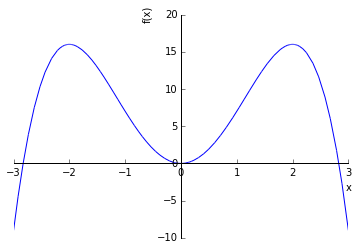

In [17]:
# (a) Generate a plot of $f$ showing all of the stationary points.
plot(f,(x,-3,3));

In [18]:
# (b) Determine each of the stationary points of $f$ and classify them using the second derivative test.
df = f.diff(x)         
display("Derivative of f(x)",df)
xStar = solve(df)       # solve (derivative=0) to get stationary points
display("Stationary points",xStar)
ddf = f.diff(x,2)       # get second derivative
for xValue in xStar:
    display (secondDerivativeTest(f,x,xValue))

'Derivative of f(x)'

'Stationary points'

'The value -2 is a local maximum.'

'The value 0 is a local minimum.'

'The value 2 is a local maximum.'

#### Question 3

The acceleration, $a$, of a machine is given by
\\[
    a = \frac{10r+1}{5r^2+3150}
\\]

where $r$ is the gear ratio. 

**(a)** Determine the value of $r$ for maximum acceleration to occur.

'Function f(x)'

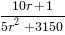

In [19]:
# Define symbols
r = Symbol('r')
a = (10*r+1)/ (5*r**2+3150)
display("Function f(x)",a)

'Derivative of f(x)'

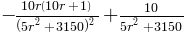

'Stationary points'

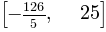

'Second derivative of f(x)'

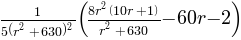

'The maximum acceleration is'

'At maximum acceleration x is'

'At maximum acceleration y is'

In [20]:
# (a) Determine the value of $r$ for maximum acceleration to occur.
da = a.diff(r)         
display("Derivative of f(x)",da)
xStar = solve(da)       # solve (derivative=0) to get stationary points
display("Stationary points",xStar)
dda = a.diff(r,2)       # get second derivative
display("Second derivative of f(x)",dda)
dda.subs(r,xStar[0])

display("The maximum acceleration is", a.subs(r,xStar[0]))
display("At maximum acceleration x is", xStar[0])
display("At maximum acceleration y is", yConstraint.subs(r,xStar[0]))

###Question 4
The displacement (position) of a particle at time $t$ is given by
\\[
    p = (1-t)e^{-t}
\\]


**(a)** Plot the position, velocity and acceleration using suitable input range.

**(b)** Determine the time, $t$, at which the velocity is zero.

**(c)** Determine the time, $t$, at which the acceleration is zero.

In [23]:
# define symbols
t = Symbol('t')
p = (1-t)*sym.exp(-t)
display("Function p(x)",p)

'Function p(x)'

'The velocity at any given time of p(x)'

'The acceleration at any given time of p(x)'

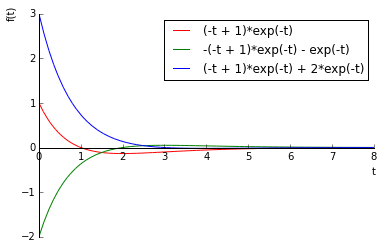

In [59]:
# (a) Plot the position, velocity and acceleration using suitable input range.
dp= p.diff(t)
display("The velocity at any given time of p(x)",dp)
ddp= dp.diff(t)
display("The acceleration at any given time of p(x)",ddp)
pPlot=plot(p,dp,ddp,(t,0,8),show=False)
pPlot.legend = True
pPlot[0].line_color = 'r'
pPlot[1].line_color = 'g'
pPlot.show()

In [56]:
# (b) Determine the time, $t$, at which the velocity is zero.
zeroVel= solve(dp)
display("The velocity is zero at time:",zeroVel)

'The velocity is zero at time:'

In [58]:
# (c) Determine the time, $t$, at which the acceleration is zero.
zeroAcc= solve(ddp)
display("The acceleration is zero at time:",zeroAcc)

'The acceleration is zero at time:'

#### Question 5

In the electronic circuit shown below, the voltage $E$ (in Volts) and resistance $r$ (in Ohms) are constant. $R$ is the resistance of a load. In such a circuit, the electric current $i$ is given by 

\\[
    i = \frac{E}{r+R}
\\]

and the power, $P$, delivered to the load $R$ is given by 
\\[
    P = R i^2
\\]
where $r$ and $R$ are both positive.

**(a)** Determine $R$ so that the power, $P$, delivered to $R$ is maximum. 
**(b)** Determine the maximum value for power, $P$. 


![](http://cdn-6.analyzemath.com/calculus/Problems/maximum_power_1.gif)

Hint (steps):

 * Define symbols ($E$, $r$ and $R$), define functions ($i$ and $P$) in terms of defined symbols.
 * Express power, $P$, in terms of $E$, $r$ and the variable $R$.
 * We now differentiate $P$ with respect to the variable $R$.
 * To find out whether $P$ has a local maximum we need to find the critical points by setting $dP/dR=0$ and solve for $R$. REMEMBER $R$ and $r$ are both positive so ignore suprious solutions.
 * You should find maximum occurs when $R=r$, then deterime the formula for the value of $P$ in this case,
 

'The function P in terms of defined symbols:'

'The function i:'

'The function P:'

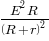

'The differential of P with respect to R:'

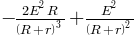

'The second differential of P with respect to R:'

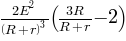

'Stationary points:'

'The value {E: 0} is a local maximum, local minimum, or a point of inflection.'

'The value {R: r} is a local maximum, local minimum, or a point of inflection.'

In [88]:
E = Symbol('E')
r = Symbol('r')
R = Symbol('R')
i = Symbol('i')
P=R*i**2
display("The function P in terms of defined symbols:",P)
i= E/(r+R)
P=R*i**2
display("The function i:",i)
display("The function P:",P)
dP=P.diff(R)
display("The differential of P with respect to R:",dP)
ddP=P.diff(R,2)
display("The second differential of P with respect to R:",ddP)
xStar=solve(dP)
display("Stationary points:",xStar)

for xValue in xStar:
    display (secondDerivativeTest(P,x,xValue))
subP=P.subs(R,r)
display(subP)